Рассчитаем экспоненциальные средние для временного ряда

![Экспоненциальные средние](1_03.gif)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("https://video.ittensive.com/time-series/ittensive.time.series.01.csv", decimal=',')
data = data[::-1].reset_index()
data.head()

,index,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
0,150,Нояб. '09,108.25,104.75,114.13,104.10,-,"3,34%"
1,149,Дек. '09,108.40,108.25,110.25,105.75,-,"0,14%"
2,148,Янв. '10,96.78,108.40,111.53,96.10,-,"-10,72%"
3,147,Февр. '10,97.13,97.03,101.13,91.43,-,"0,36%"
4,146,Март '10,98.88,97.13,100.38,91.78,-,"1,80%"


Вычислим бегущее среднее с окнами в 2, 3, 6 и 12 месяцев назад

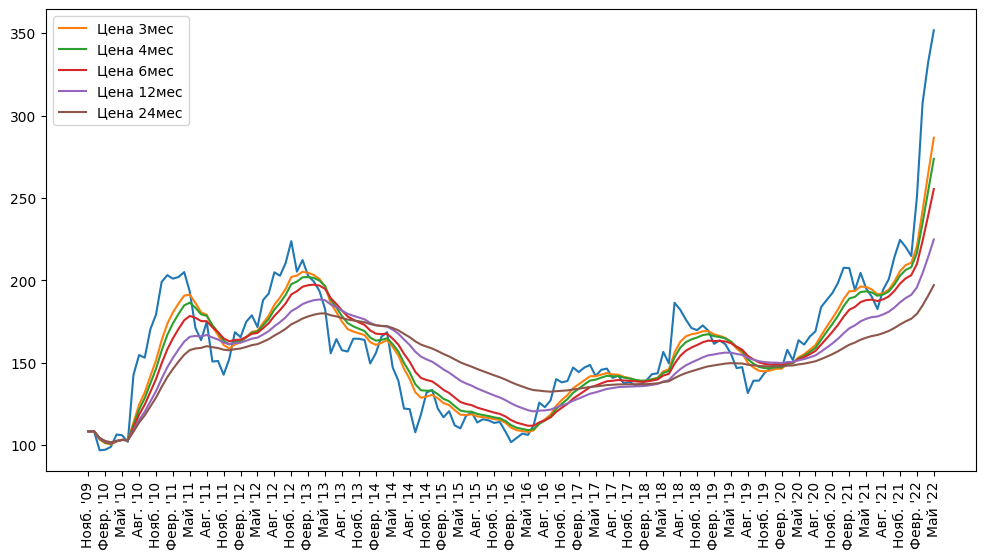

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(data["Дата"].values,data["Цена"].values)
labels = []
for window in [3,4,6,12,24]:
    label = "Цена " + str(window) + "мес"
    data[label] = data["Цена"].ewm(window).mean()
    labels.append(label)
    plt.plot(data[label], label=label)
plt.xticks(data.index[::3], data["Дата"].values[::3], rotation=90)
plt.legend()
plt.show()

In [19]:
data[10:15]

,index,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Цена 3мес,Цена 4мес,Цена 6мес,Цена 12мес,Цена 24мес,Предсказание
10,140,Сент. '10,153.00,156.00,171.5,151.00,"7,30K","-1,03%",131.903129,128.427811,124.468351,120.158806,117.957416,0.000000
11,139,Окт. '10,170.25,155.00,170.0,148.25,"4,64K","11,27%",141.803453,137.409463,132.229098,126.400744,123.358284,0.000000
12,138,Нояб. '10,179.20,170.50,180.0,161.00,"0,76K","5,26%",151.380105,146.253793,139.984685,132.680658,128.782461,177.727268
13,137,Дек. '10,199.00,181.25,200.0,181.25,"3,01K","11,05%",163.501049,157.288339,149.516819,140.250583,135.234400,189.023958
14,136,Янв. '11,203.10,203.30,204.0,191.25,"0,18K","2,06%",173.534873,166.784798,158.012996,147.167006,141.162645,205.506706


In [20]:
data[labels]

,Цена 3мес,Цена 4мес,Цена 6мес,Цена 12мес,Цена 24мес
0,108.250000,108.250000,108.250000,108.250000,108.250000
1,108.335714,108.333333,108.330769,108.328000,108.326531
2,103.338649,103.598361,103.874173,104.166780,104.319545
3,101.068057,101.407182,101.780733,102.191086,102.410648
4,100.350845,100.655402,101.009538,101.418857,101.645724
...,...,...,...,...,...
146,210.594957,207.968073,203.095878,191.161852,176.635124
147,220.583718,216.484458,209.875038,195.730204,179.598765
148,242.312788,234.687566,223.821461,204.327938,184.726519
149,264.859591,254.250053,239.346967,214.187387,190.650438


Построим линейную регрессию на бегущих средних

In [5]:
x = data[labels][11:len(data)-1]
y = data["Цена"][12:]
model = LinearRegression().fit(x, y)
data["Предсказание"] = np.append(np.zeros(12), model.predict(x))
print ("Коэффициенты модели:", model.coef_)

Коэффициенты модели: [ 31.02747605 -55.5743512   31.52976819  -6.88001315   0.80183397]


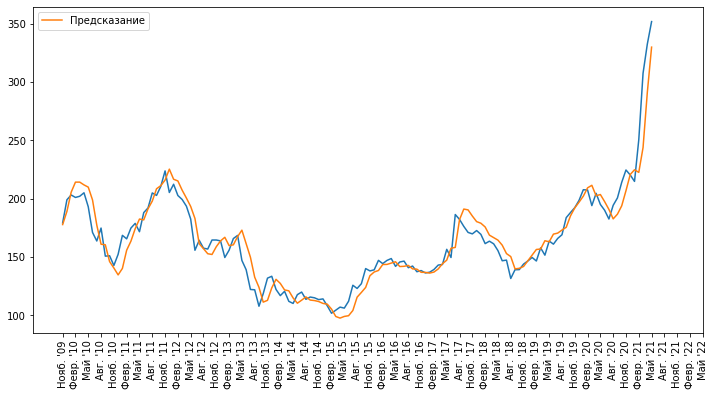

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(data["Дата"][12:].values,data["Цена"][12:].values)
plt.plot(model.predict(x), label="Предсказание")
plt.xticks(data.index[::3], data["Дата"].values[::3], rotation=90)
plt.legend()
plt.show()

Вычислим среднеквадратичную ошибку

In [6]:
print ("MSE:", round((data[12:].apply(lambda row: (row['Цена'] - row['Предсказание'])**2, axis=1).sum()/(len(data)-12))**(0.5),2))

MSE: 12.71
